Mounting with Drive:

In [2]:
from google.colab import drive 
drive.mount('/content/drive') 

Mounted at /content/drive


Import important libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import os


In [4]:
# data path in drive
data_path = '/content/drive/MyDrive/ECG-IDpreprocessing/ecg-id-database-1.0.0/'


In [5]:
# store just patients folders in pts list:
pts=[]
for i in os.listdir(data_path):
    pts.append(i)
## pts is a list, and we can add elements on a list in python by (append).
## So we add all the files that exists in data_path

In [6]:
pts

['Person_88',
 'Person_89',
 'Person_87',
 'Person_85',
 'Person_90',
 'Person_83',
 'Person_86',
 'Person_81',
 'Person_82',
 'Person_84',
 'Person_79',
 'Person_78',
 'Person_75',
 'Person_73',
 'Person_80',
 'Person_72',
 'Person_76',
 'Person_77',
 'Person_71',
 'Person_74',
 'Person_65',
 'Person_69',
 'Person_66',
 'Person_67',
 'Person_68',
 'Person_62',
 'Person_63',
 'Person_70',
 'Person_64',
 'Person_61',
 'Person_55',
 'Person_51',
 'Person_52',
 'Person_54',
 'Person_53',
 'Person_56',
 'Person_57',
 'Person_60',
 'Person_58',
 'Person_59',
 'Person_44',
 'Person_46',
 'Person_47',
 'Person_50',
 'Person_42',
 'Person_43',
 'Person_49',
 'Person_45',
 'Person_48',
 'Person_41',
 'Person_34',
 'Person_37',
 'Person_33',
 'Person_38',
 'Person_35',
 'Person_32',
 'Person_31',
 'Person_39',
 'Person_36',
 'Person_40',
 'Person_30',
 'Person_29',
 'Person_21',
 'Person_23',
 'Person_22',
 'Person_28',
 'Person_27',
 'Person_24',
 'Person_26',
 'Person_25',
 'Person_14',
 'Pers

## **WFDB**:  is a set of functions (subroutines) for reading and writing files in the formats used by PhysioBank databases 

you can see more detailes in the link below:
https://wfdb.readthedocs.io/en/latest/

In [7]:
# intall wfdb library:
!pip install wfdb


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 KB 4.9 MB/s eta 0:00:00


In [8]:
import wfdb

In [9]:
df = pd.DataFrame()
import os 
for pt in pts: 
    file = data_path + pt+'/'
    
    for i in os.listdir(file):
        k= file+i[:-4] 
      
        annotation = wfdb.rdann(k, 'atr')
        sym = annotation.symbol
        values, counts = np.unique(sym, return_counts=True)
        df_sub = pd.DataFrame({'sym':values, 'val':counts, 'pt':[pt]*len(counts)})
        df = pd.concat([df, df_sub],axis = 0)
## dataframes in pandas library allow us to deal with data simply by visulization it in tables.
## In df_sub dataframe we have three columns, Sym, val, pt and then combine all the sub dfs in one dataframe which is df.

In [10]:
import os
for participant in pts:
    files = os.listdir(data_path + participant)
    # print("files: ",files)
    if len([x for x in files if '.dat' in x]) > 0: 
        file = [x for x in files if '.dat' in x][0].split(".")[0]
        # print("file: ", file) 
        signals, info = wfdb.rdsamp(data_path + participant + "/" + file)
## here, in for loop we pass on all the patients and for each one, we check if the dat files in it are > 0 or not
## by using if conditions and then extract the signals and the information from it.

In [11]:
#we will group or dataframe based on symbols which are N: abnormal and t: inverted"non beat"
df.groupby('sym').val.sum().sort_values(ascending = False)
## groupby is afunction in pandas allow us to group our dataframe by a specefic column, in our case sym.


sym
N    9330
t    9330
Name: val, dtype: int64

In [12]:
#we will use this function to load the most three important things in the database
# which are signal, symbols, and samples.
def load_ecg(file):

    record = wfdb.rdrecord(file)
    # load the annotation
    annotation = wfdb.rdann(file, 'atr')
    
    # extract the signal
    p_signal = record.p_signal
    
    # verify frequency is 500
    assert record.fs == 500, 'sample freq is not 360'
    
    # extract symbols and annotation index
    atr_sym = annotation.symbol
    atr_sample = annotation.sample
    
    return p_signal, atr_sym, atr_sample 
## load_ecg function is clear, we just load the annotations and signal then extract symbols from them.

In [13]:

# now we will create two lists, one for nonbeat symbols(t) and the other for abnormal symbols(N)
nonbeat=['t']
abnormal=['N'] 
## two lists to classify the signals.

This an example of applying load_ecg() in one record:

In [21]:
file = data_path + pts[0]+'/rec_1'

In [ ]:
p_signal, atr_sym, atr_sample = load_ecg(file)

In [ ]:
values, counts = np.unique(sym, return_counts=True)
for v,c in zip(values, counts):
    print(v,c)

N 10
t 10


In [28]:
# get abnormal beat index
ab_index = [b for a,b in zip(atr_sym,atr_sample) if a in abnormal][:10]
ab_index
## for loop pass on the extracted symbols and annotation index to get just the abnormal beats and save it in ab_index list.

In [ ]:
x = np.arange(len(p_signal))
# to get evenly spaced values from p_signal  

In [ ]:
ab_index[1]

831

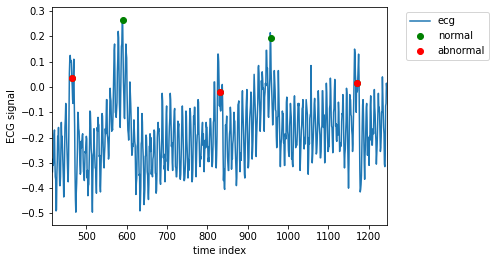

In [ ]:
left = ab_index[1]-415
right = ab_index[1]+415

plt.plot(x[left:right],p_signal[left:right,0],'-',label='ecg',)
plt.plot(x[atr_sample],p_signal[atr_sample,0],'go',label ='normal')
plt.plot(x[ab_index],p_signal[ab_index,0],'ro',label='abnormal')

plt.xlim(left,right)
plt.ylim(p_signal[left:right].min()-0.05,p_signal[left:right,0].max()+0.05)
plt.xlabel('time index')
plt.ylabel('ECG signal')
plt.legend(bbox_to_anchor = (1.04,1), loc = 'upper left')
plt.show()
## here, to plot a signal using matplot library we need to determine the classes (ecg, normal, abnormal) 
## also the axis (500-1200) for time and (-0.5..0.3) for the signal and this is done by using standard instructions in this library.

End of the example.

In [14]:
def make_dataset(pts, num_sec, fs, abnormal):
    # function for making dataset ignoring non-beats
    # input:
    # pts - list of patients
    # num_sec = number of seconds to include before and after the beat
    # fs = frequency
    # output: 
    #   X_all = signal (nbeats , num_sec * fs columns)
    #   Y_all = binary is abnormal (nbeats, 1)
    #   sym_all = beat annotation symbol (nbeats,1)
    
    # initialize numpy arrays
    num_cols = 2*num_sec * fs
    X_all = np.zeros((1,num_cols))
    Y_all = np.zeros((1,1))
    sym_all = []
    
    # list to keep track of number of beats across patients
    max_rows = []
    
    for pt in pts:
        file = data_path + pt+'/rec_2'
        
        p_signal, atr_sym, atr_sample = load_ecg(file)
        
        # grab the first signal
        p_signal = p_signal[:,0]
        
        # make df to exclude the nonbeats
        df_ann = pd.DataFrame({'atr_sym':atr_sym,
                              'atr_sample':atr_sample})
        df_ann = df_ann.loc[df_ann.atr_sym.isin(abnormal + ['N'])]
                            
        X,Y,sym = build_XY(p_signal,df_ann, num_cols, abnormal)
        sym_all = sym_all+sym
        max_rows.append(X.shape[0])
        X_all = np.append(X_all,X,axis = 0)
        Y_all = np.append(Y_all,Y,axis = 0)
    # drop the first zero row
    X_all = X_all[1:,:]
    Y_all = Y_all[1:,:]
    
    # check sizes make sense
    assert np.sum(max_rows) == X_all.shape[0], 'number of X, max_rows rows messed up'
    assert Y_all.shape[0] == X_all.shape[0], 'number of X, Y rows messed up'
    assert Y_all.shape[0] == len(sym_all), 'number of Y, sym rows messed up'

    return X_all, Y_all, sym_all
                            
## first of all, To intialize the arryas, we need to determine the shape of X_ALL, Y_ALL.
## X_all at the first, is a zero array ,with shape( 1, 2*3*500), which mean an array with all the values in it are zeros.
## this can be done by using np.zeros().
## y_all is also a zero array but with shape (1,1).
## Now, for each signal in our data, we need to load it by load_ecg function, then delete the nonbeat signals
## by using dataframe.loc which link all the abnormal beats with Symbol N.
## Now we call the function build_XY then update the values of x_all, y_all, sym_all arrays


In [15]:
def build_XY(p_signal, df_ann, num_cols, abnormal):
    # this function builds the X,Y matrices for each beat
    # it also returns the original symbols for Y
    
    num_rows = len(df_ann)

    X = np.zeros((num_rows, num_cols))
    Y = np.zeros((num_rows,1))
    sym = []
    
    # keep track of rows
    max_row = 0

    for atr_sample, atr_sym in zip(df_ann.atr_sample.values,df_ann.atr_sym.values):

        left = max([0,(atr_sample - num_sec*fs) ])
        right = min([len(p_signal),(atr_sample + num_sec*fs) ])
        x = p_signal[left: right]
        if len(x) == num_cols:
            X[max_row,:] = x
            Y[max_row,:] = int(atr_sym in abnormal)
            sym.append(atr_sym)
            max_row += 1
    X = X[:max_row,:]
    Y = Y[:max_row,:]
    return X,Y,sym


In [16]:
# number of seconds in this database is 3 and the frequencey is 500
num_sec = 3
fs = 500

In [17]:
X_all, Y_all, sym_all = make_dataset(pts, num_sec, fs, abnormal)

In [18]:
X_all

array([[-0.195, -0.6  , -0.96 , ...,  0.205,  0.51 ,  0.095],
       [-0.585, -0.415, -0.35 , ..., -0.245, -0.79 , -0.655],
       [ 0.01 , -0.465, -0.975, ...,  0.09 ,  0.675,  0.415],
       ...,
       [-0.435, -0.405, -0.38 , ..., -0.58 , -0.475, -0.585],
       [-0.2  , -0.215, -0.28 , ..., -0.55 , -0.52 , -0.47 ],
       [-0.495, -0.45 , -0.34 , ..., -0.6  , -0.7  , -0.58 ]])

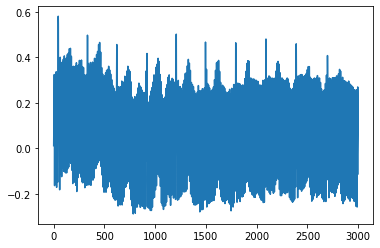

In [43]:
plt.plot(X_all[15])
plt.show()

Normalization Step:

In [19]:
X_all = X_all/np.max(X_all)
## Normalization always done by dividing the array by the maximum value in it.
## we can get this maximum value by numpy.max()

In [20]:
X_all

array([[-0.05918058, -0.18209408, -0.29135053, ...,  0.06221548,
         0.15477997,  0.02883156],
       [-0.17754173, -0.12594841, -0.10622155, ..., -0.07435508,
        -0.23975721, -0.19878604],
       [ 0.0030349 , -0.14112291, -0.29590288, ...,  0.02731411,
         0.20485584,  0.12594841],
       ...,
       [-0.13201821, -0.12291351, -0.11532625, ..., -0.17602428,
        -0.14415781, -0.17754173],
       [-0.06069803, -0.06525038, -0.08497724, ..., -0.16691958,
        -0.15781487, -0.14264036],
       [-0.15022762, -0.13657056, -0.10318665, ..., -0.18209408,
        -0.2124431 , -0.17602428]])

In [21]:
X_all.shape

(581, 3000)

In [34]:
type(X_all)

numpy.ndarray

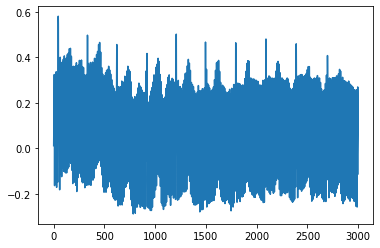

In [44]:
plt.plot(X_all[15])
plt.show()

**Noise removal step:**

we will remove noise from this database by using discrete wavelet transform.
The outputs are A and D the reconstruction wavelet coefficients

A: The approximation output which is the low frequency content of the input signal component.

D: The multidimensional output which gives the details, or the high frequency components, of the input signal at various levels

In [22]:
import pywt #PyWavelets is open source wavelet transform software for Python. It combines a simple high level interface with low level C and Cython performance.


In [23]:
A, D = pywt.dwt(X_all, wavelet= 'db1', mode='symmetric') #Daubechies (db) wavelet 


In [45]:
print(A)

[[-0.17060695 -0.3154619  -0.14056296 ... -0.06867198  0.04184699
   0.12983296]
 [-0.21459993 -0.11588396  0.02467899 ...  0.14485496  0.009657
  -0.3100969 ]
 [-0.09764297 -0.34657889 -0.17167995 ... -0.09013197  0.02467899
   0.23391393]
 ...
 [-0.18026394 -0.13305196 -0.15451195 ... -0.15343895 -0.20279694
  -0.22747593]
 [-0.08905897 -0.11266497 -0.19528594 ... -0.24893592 -0.24786292
  -0.21245393]
 [-0.20279694 -0.15129295 -0.17704495 ... -0.21781893 -0.25537392
  -0.27468791]]


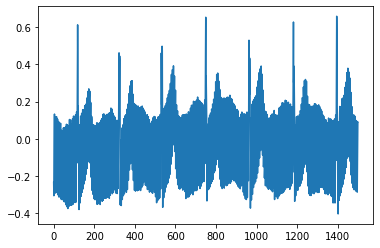

In [46]:
plt.plot(A[5])
plt.show()

In [47]:
print(D)

[[ 0.08691297 -0.09656997 -0.02467899 ... -0.04721199 -0.04613899
   0.08905897]
 [-0.03648199 -0.03433599 -0.09120497 ... -0.12554096  0.11481096
  -0.02897099]
 [ 0.10193497 -0.07189098 -0.02145999 ... -0.04077399 -0.013949
   0.05579598]
 ...
 [-0.006438   -0.03004399  0.008584   ...  0.009657    0.04613899
   0.02360599]
 [ 0.003219   -0.007511    0.02789799 ...  0.01073    -0.011803
  -0.01073   ]
 [-0.009657    0.005365   -0.005365   ...  0.02253299  0.002146
  -0.02575199]]


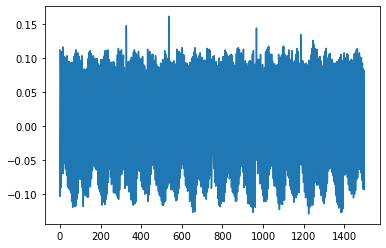

In [48]:
plt.plot(D[5])
plt.show()

**Data Augmentation step**:

In [24]:
from scipy.signal import resample

In [25]:

new=[]
for i in range(len(X_all)):
  isg= resample(X_all[i], len(X_all[i])) * -1
  new.append(isg)


In [26]:
new

[array([ 0.05918058,  0.18209408,  0.29135053, ..., -0.06221548,
        -0.15477997, -0.02883156]),
 array([0.17754173, 0.12594841, 0.10622155, ..., 0.07435508, 0.23975721,
        0.19878604]),
 array([-0.0030349 ,  0.14112291,  0.29590288, ..., -0.02731411,
        -0.20485584, -0.12594841]),
 array([0.13201821, 0.12898331, 0.02731411, ..., 0.13960546, 0.25189681,
        0.1107739 ]),
 array([0.1047041 , 0.11532625, 0.01669196, ..., 0.14415781, 0.27314112,
        0.14264036]),
 array([ 0.08649469,  0.24430956,  0.28831563, ..., -0.12746586,
        -0.1198786 , -0.0060698 ]),
 array([0.28072838, 0.13201821, 0.12898331, ..., 0.00455235, 0.13505311,
        0.24886191]),
 array([-0.05918058, -0.30500759, -0.19271624, ...,  0.0030349 ,
        -0.11532625, -0.14112291]),
 array([-0.11532625,  0.05462822,  0.28224583, ..., -0.17602428,
        -0.33990895, -0.37481032]),
 array([ 0.12898331,  0.02579666,  0.01820941, ...,  0.18209408,
         0.03945372, -0.04400607]),
 array([ 0.009

In [27]:
len(new)

581

In [28]:
new_X=[]
import random
p = random.sample(new, 10)
for i in p: 
   new_X.append(p)
 

In [29]:
len(new_X)

10

In [30]:
new_X = np.array(new_X)[0]

In [31]:
new_X.shape

(10, 3000)

In [32]:
X_ALL_AFTER_AUG = np.append(X_all, new_X, axis=0)

In [33]:
type(new_X)

numpy.ndarray

In [34]:
X_ALL_AFTER_AUG.shape

(591, 3000)

# **Step2**

apply Signal transformation using Short-time Fourier 

In [35]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import librosa.display

In [37]:
S=[]
for i in X_ALL_AFTER_AUG:
  signal = np.abs(librosa.stft(i))
  S.append(signal)  



Let's plot a signal from X_aLL after applying STFT on it.

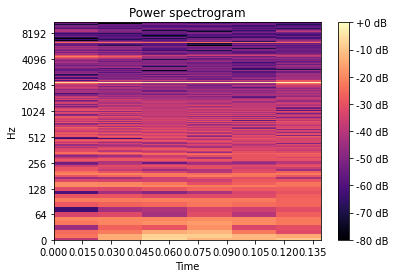

In [38]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S[7],
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

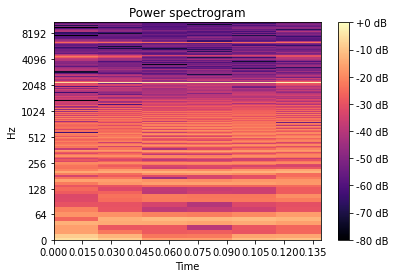

In [39]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S[6],
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

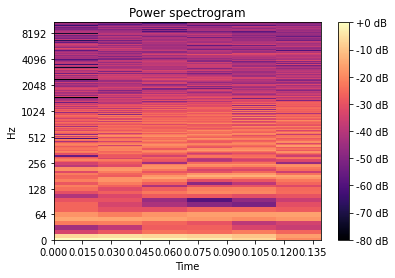

In [40]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S[19],
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")